In [3]:
import sys
sys.path.append('../')
from KG import spatial_triples, temporal_triples  #空间三元组和时间三元组
from model import train_transe, train_transh
from evaluate import evaluate_transhmodel, evaluate_tranemodel


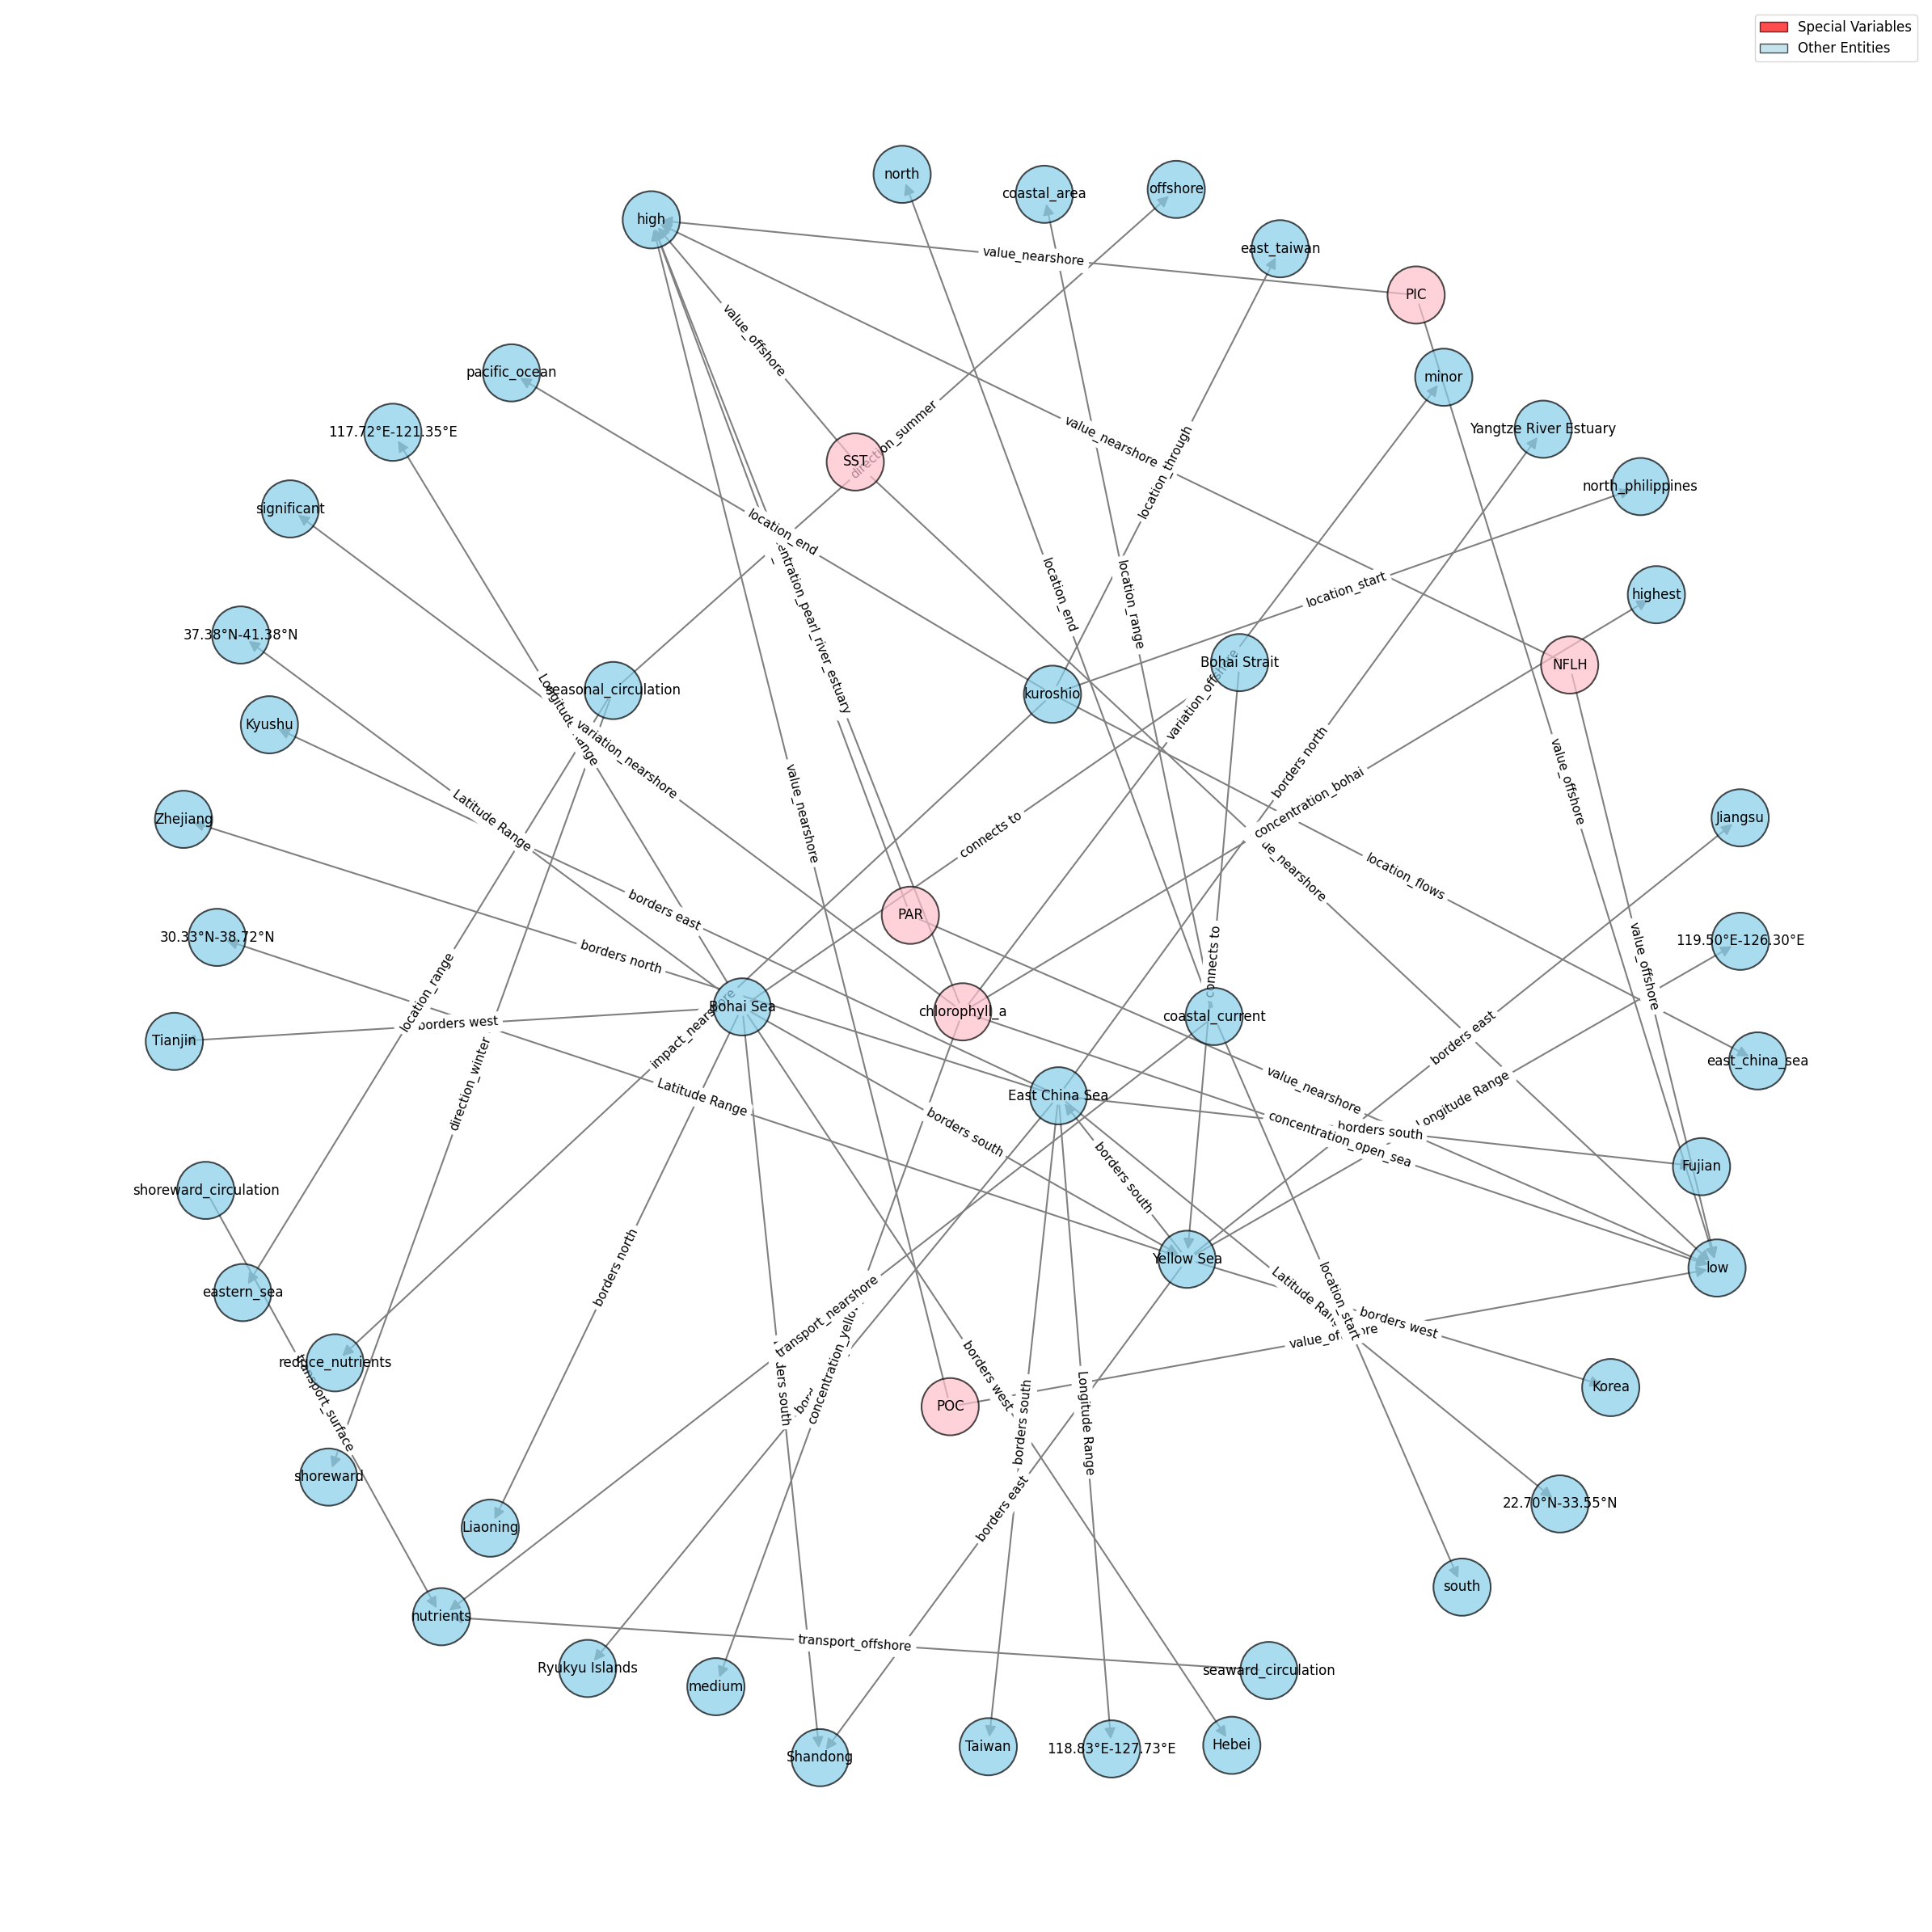

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建有向图
G = nx.DiGraph()

# 定义特殊节点列表
special_nodes = ['chlorophyll_a', 'SST', 'PAR', 'POC', 'PIC', 'NFLH']

# 解析三元组数据并添加到图中
triples = spatial_triples
# 添加边
for head, relation, tail in triples:
    G.add_edge(head, tail, relation=relation)

# 设置绘图参数
plt.figure(figsize=(24, 24))  # 增大图形尺寸

# 使用spring_layout但增加k值使节点更分散
pos = nx.spring_layout(G, k=2, iterations=100)  # 增加k值和迭代次数

# 准备节点颜色列表
node_colors = ['pink' if node in special_nodes else 'skyblue' for node in G.nodes()]

# 绘制节点（添加边界线）
nx.draw_networkx_nodes(G, pos, 
                      node_color=node_colors,
                      node_size=2600,  # 略微增大节点尺寸
                      alpha=0.7,
                      edgecolors='black',  # 添加黑色边界线
                      linewidths=1.5)  # 设置边界线宽度

# 绘制边
nx.draw_networkx_edges(G, pos, 
                      edge_color='gray',
                      arrows=True,
                      arrowsize=20,
                      width=1.5)  # 增加边的宽度

# 添加节点标签
nx.draw_networkx_labels(G, pos, font_size=12)  # 增大字体

# 添加边标签
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=11)

# 添加图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.7, label='Special Variables'),
    Patch(facecolor='lightblue', edgecolor='black', alpha=0.7, label='Other Entities')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

# 调整布局
plt.axis('off')
plt.tight_layout()

# 显示图形
plt.show()

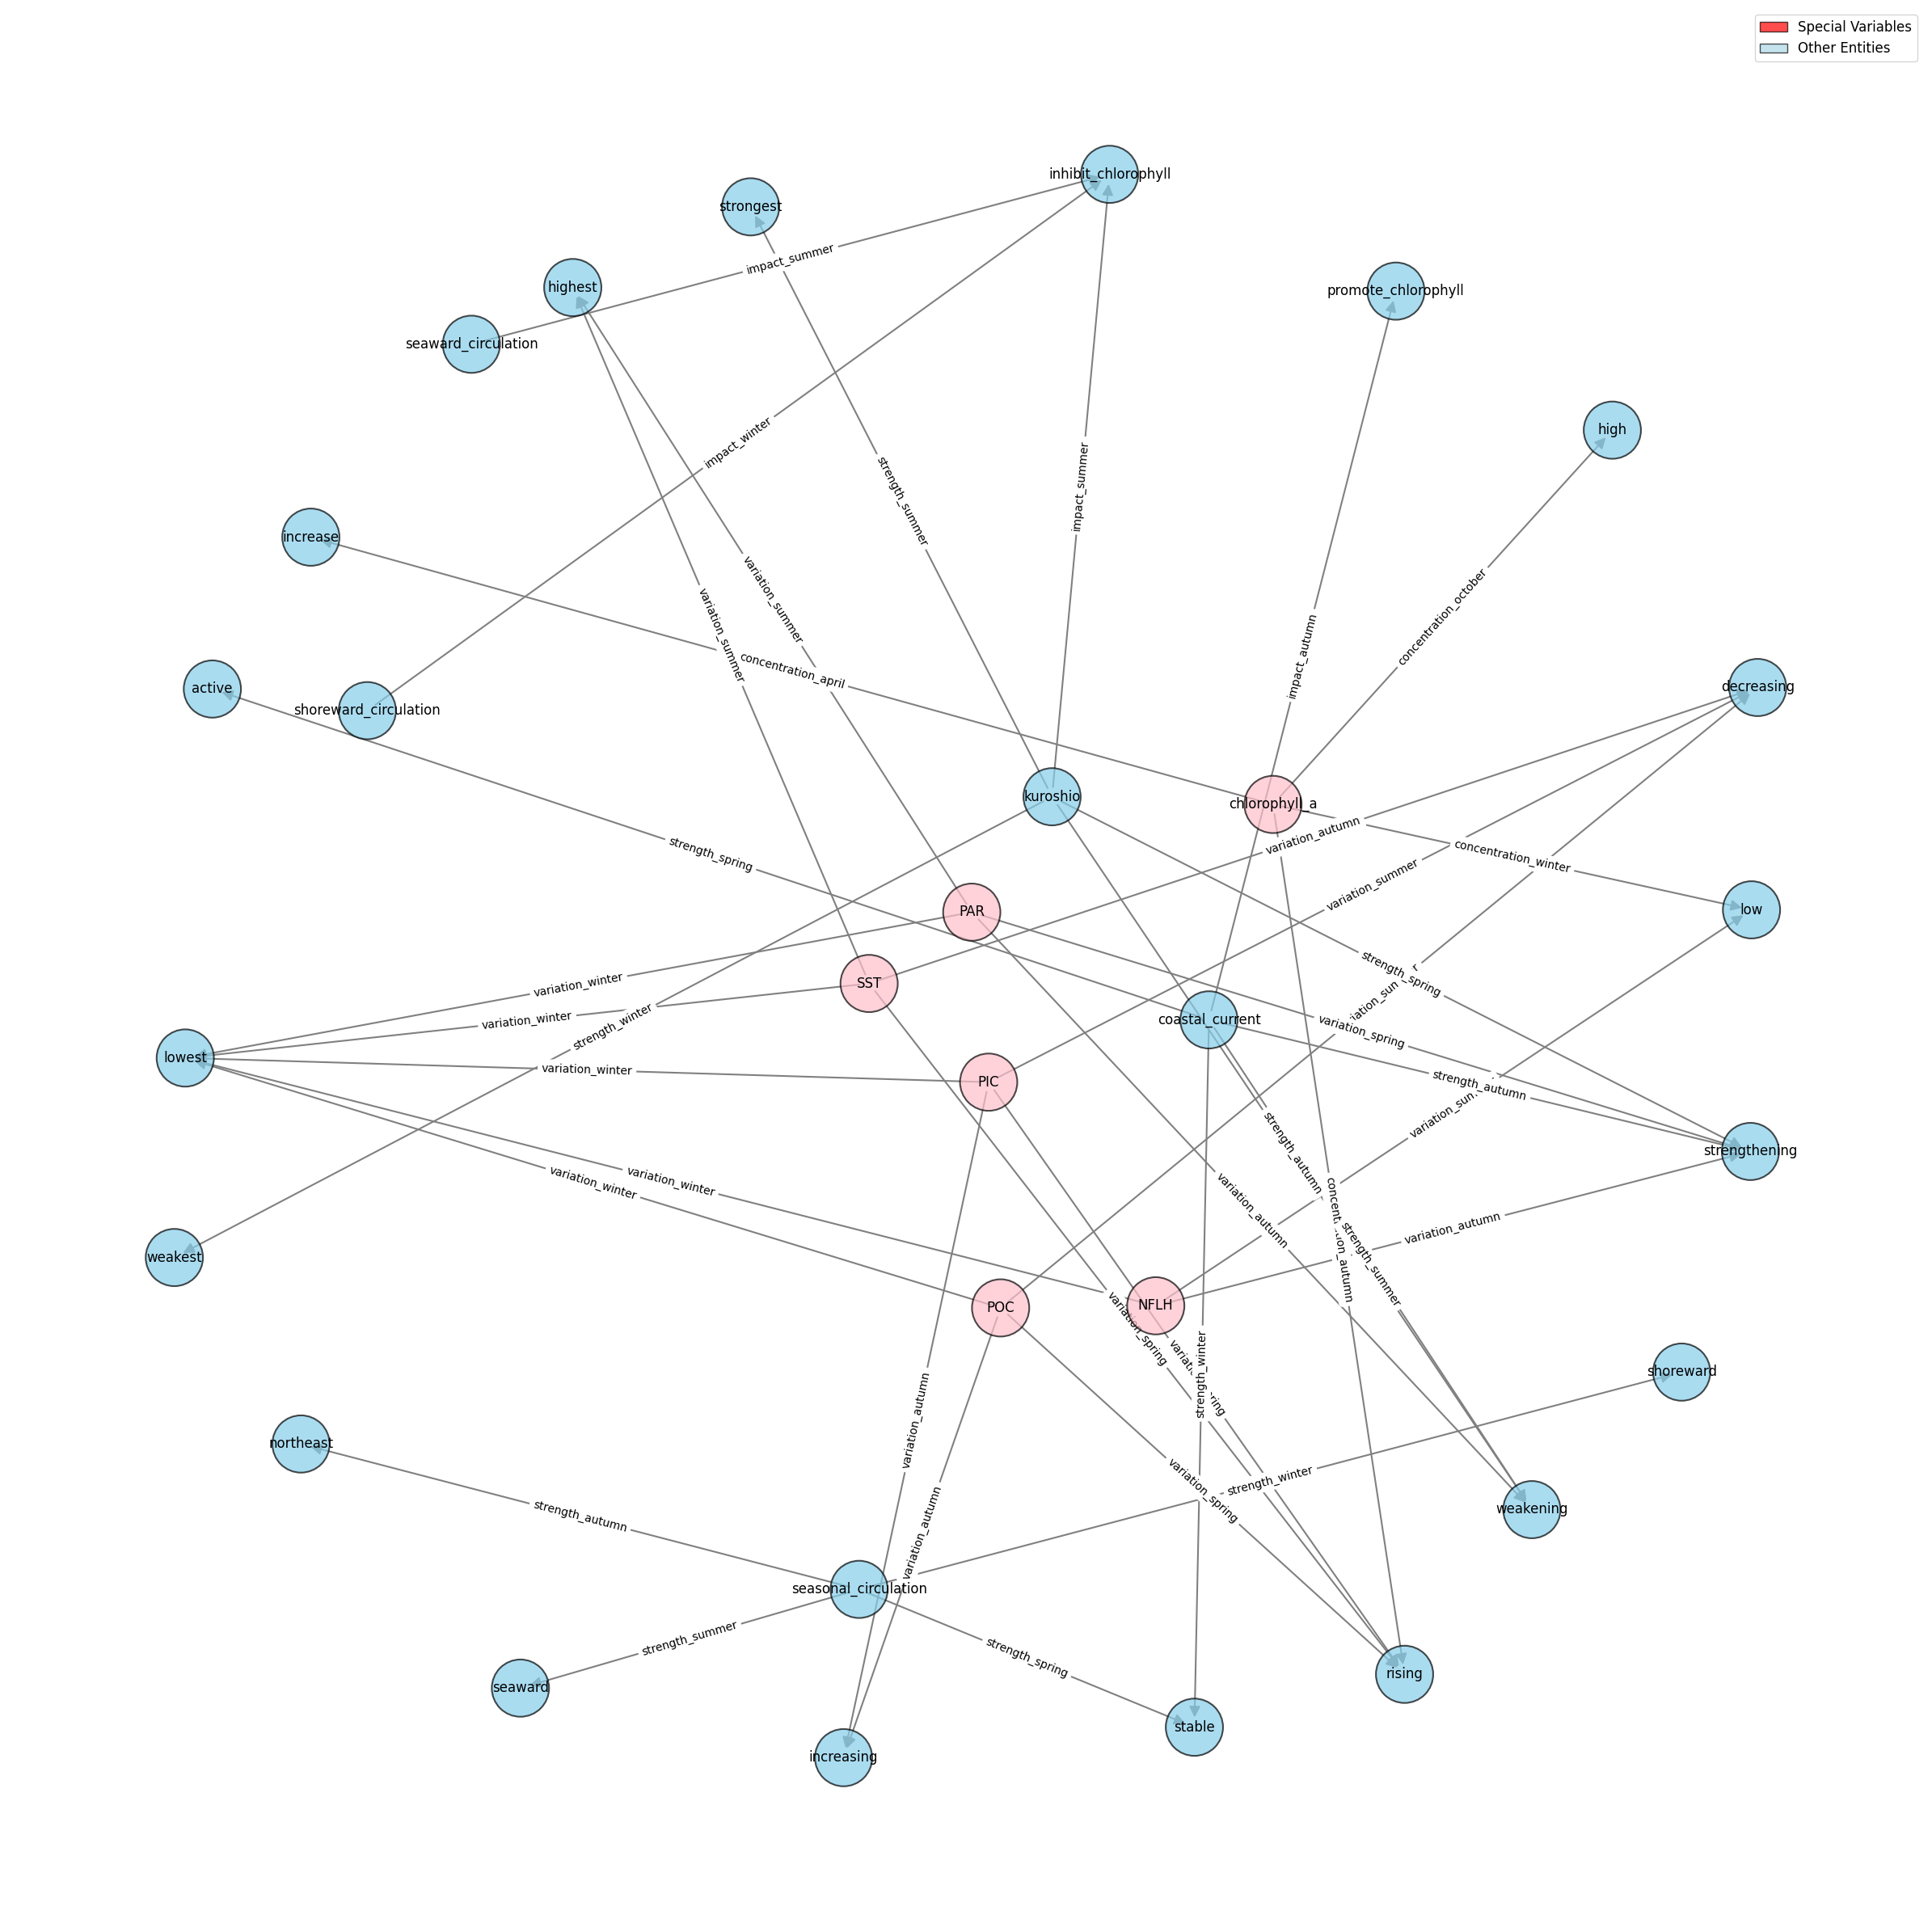

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建有向图
G = nx.DiGraph()

# 定义特殊节点列表
special_nodes = ['chlorophyll_a', 'SST', 'PAR', 'POC', 'PIC', 'NFLH']

# 解析三元组数据并添加到图中
triples = temporal_triples
# 添加边
for head, relation, tail in triples:
    G.add_edge(head, tail, relation=relation)

# 设置绘图参数
plt.figure(figsize=(24, 24))  # 增大图形尺寸

# 使用spring_layout但增加k值使节点更分散
pos = nx.spring_layout(G, k=2, iterations=100)  # 增加k值和迭代次数

# 准备节点颜色列表
node_colors = ['pink' if node in special_nodes else 'skyblue' for node in G.nodes()]

# 绘制节点（添加边界线）
nx.draw_networkx_nodes(G, pos, 
                      node_color=node_colors,
                      node_size=2600,  # 略微增大节点尺寸
                      alpha=0.7,
                      edgecolors='black',  # 添加黑色边界线
                      linewidths=1.5)  # 设置边界线宽度

# 绘制边
nx.draw_networkx_edges(G, pos, 
                      edge_color='gray',
                      arrows=True,
                      arrowsize=20,
                      width=1.5)  # 增加边的宽度

# 添加节点标签
nx.draw_networkx_labels(G, pos, font_size=12)  # 增大字体

# 添加边标签
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10)

# 添加图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.7, label='Special Variables'),
    Patch(facecolor='lightblue', edgecolor='black', alpha=0.7, label='Other Entities')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

# 调整布局
plt.axis('off')
plt.tight_layout()

# 显示图形
plt.show()

In [ ]:
# 空间三元组训练TransE和TransH模型
transe_model, transe_dataset = train_transe(spatial_triples, epochs=500)
transh_model, transh_dataset = train_transh(spatial_triples, epochs=500)
# 在训练后评估模型

print("空间三元组评估TransE模型结果")
evaluate_tranemodel(transe_model, transe_dataset)
print("空间三元组评估TransH模型结果")
evaluate_transhmodel(transh_model, transh_dataset)


Raw Metrics:
MR: 1.6119
MRR: 0.7998
Hits@1: 0.6716
Hits@3: 0.9179
Hits@10: 1.0000

Filtered Metrics:
Filtered_MR: 1.4552
Filtered_MRR: 0.8184
Filtered_Hits@1: 0.6791
Filtered_Hits@3: 0.9851
Filtered_Hits@10: 1.0000

Raw Metrics:
MR: 25.7761
MRR: 0.0751
Hits@1: 0.0000
Hits@3: 0.0448
Hits@10: 0.1940

Filtered Metrics:
Filtered_MR: 25.6194
Filtered_MRR: 0.0753
Filtered_Hits@1: 0.0000
Filtered_Hits@3: 0.0448
Filtered_Hits@10: 0.1940


In [ ]:
# 时间三元组训练TransE和TransH模型
transe_model, transe_dataset = train_transe(temporal_triples, epochs=500)
transh_model, transh_dataset = train_transh(temporal_triples, epochs=500)
# 在训练后评估模型
print("时间三元组评估TransE模型结果")
evaluate_tranemodel(transe_model, transe_dataset)
print("时间三元组评估TransH模型结果")
evaluate_transhmodel(transh_model, transh_dataset)

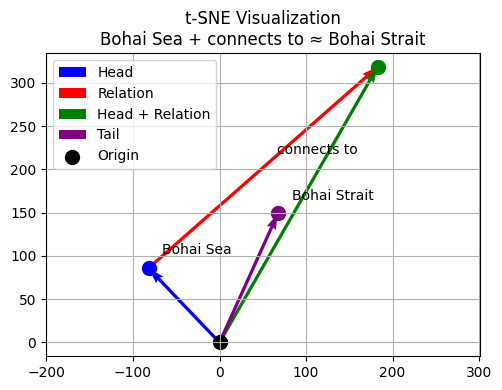


t-SNE 度量:
预测点到尾实体的距离: 204.8072
头实体到尾实体的距离: 162.3674
关系向量长度: 352.3979


In [ ]:
# 可视化
from visualization import visualize

visualize(transh_model, transh_dataset, triple_idx=4)

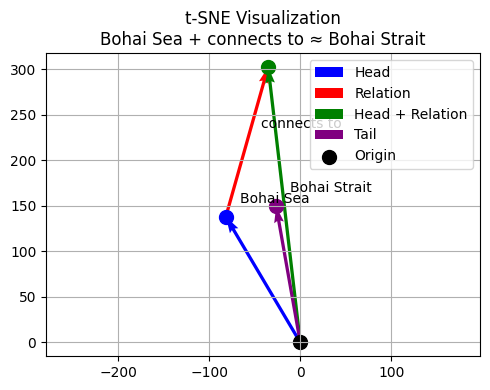

预测点到尾实体的距离: 153.4613
头实体到尾实体的距离: 56.4850
关系向量长度: 171.0287


In [3]:
# 可视化
from visualization import visualize

visualize(transe_model, transe_dataset, triple_idx=4)